In [6]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [28]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

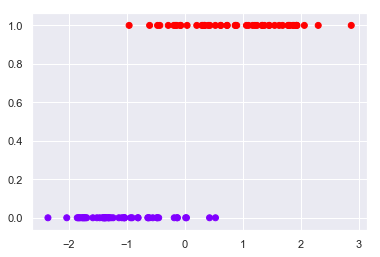

In [29]:
plt.scatter(x, y, c=y, cmap='rainbow')

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [31]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

/Users/cmaklin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
print(lr.coef_)
print(lr.intercept_)

[[2.40064142]]
[0.48813722]


In [33]:
y_pred = lr.predict(x_test)

In [34]:
confusion_matrix(y_test, y_pred)

array([[ 7,  4],
       [ 2, 12]])

In [35]:
lr.predict_proba(x_test)

array([[0.04585002, 0.95414998],
       [0.90328926, 0.09671074],
       [0.72523127, 0.27476873],
       [0.2323403 , 0.7676597 ],
       [0.03575173, 0.96424827],
       [0.01475349, 0.98524651],
       [0.17829924, 0.82170076],
       [0.45621581, 0.54378419],
       [0.65790331, 0.34209669],
       [0.93379773, 0.06620227],
       [0.03004157, 0.96995843],
       [0.14767527, 0.85232473],
       [0.0964226 , 0.9035774 ],
       [0.97699582, 0.02300418],
       [0.27207974, 0.72792026],
       [0.14713237, 0.85286763],
       [0.65365559, 0.34634441],
       [0.95375193, 0.04624807],
       [0.94444569, 0.05555431],
       [0.00592934, 0.99407066],
       [0.01843288, 0.98156712],
       [0.22463648, 0.77536352],
       [0.48670778, 0.51329222],
       [0.7238756 , 0.2761244 ],
       [0.36373726, 0.63626274]])

In [ ]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})

df = df.sort_values(by='x')

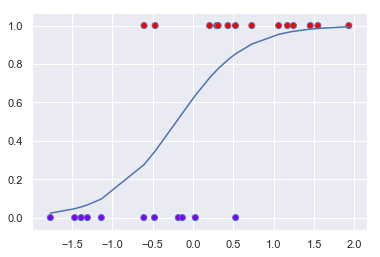

In [51]:
from scipy.special import expit

sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()

plt.plot(df['x'], sigmoid_function)

plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')